# Homework


The homework is to prepare a report for the Ministry of Transport, revealing the nature and characteristics of flight delays. The report should help identify problem areas and contribute to decision-making. Therefore, strive not to state general facts, but to show problems. For example, the fact "the average departure delay is 15 minutes" by itself says little and does not help to understand why this is happening. On the contrary, a graph showing that on Mondays delays increase threefold compared to other days against the background of an increase in the number of flights and passengers suggests a possible cause of the problem: airports cannot cope with uneven load.

The report should be in the form of a notebook with a clear structure. At the beginning of the Markdown cell there is a brief description of the question under study (what we will study), then the code and all its outputs (tables, graphs, values), then again in the Markdown cell in which your brief conclusion is formulated.

The report should contain at least **5 results** confirmed by graphs. For variety of material, use different types of diagrams. All graphs should be provided with the necessary signatures (axis designations, title, color scheme legend).

To solve the problems, use the methods of the `pandas` library.

Домашним заданием является подготовка отчета для Министерства транспорта, раскрывающего природу и особенности задержек рейсов. Отчет должен помочь выявить проблемные области и способствовать принятию решений. Поэтому старайтесь не излагать общие факты, а показывать проблемы. Например, тот факт, что "средняя задержка вылета составляет 15 минут" сам по себе мало о чем говорит и не помогает понять, почему это происходит. Напротив, график, показывающий, что по понедельникам задержки увеличиваются втрое по сравнению с другими днями на фоне увеличения количества рейсов и пассажиров, наводит на мысль о возможной причине проблемы: аэропорты не справляются с неравномерной загрузкой.

Отчет должен быть оформлен в виде блокнота с четкой структурой. В начале ячейки Markdown есть краткое описание изучаемого вопроса (что мы будем изучать), затем код и все его выходные данные (таблицы, графики, значения), затем снова ячейка Markdown, в которой сформулирован ваш краткий вывод.

Отчет должен содержать не менее 5 результатов, подтвержденных графиками. Для разнообразия материала используйте различные типы диаграмм. Все графики должны быть снабжены необходимыми подписями (обозначения осей, заголовок, цветовая схема).

Для решения задач используйте методы библиотеки pandas.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
airlines = pd.read_csv('airlines.csv',low_memory=False)
airports = pd.read_csv('airports.csv',low_memory=False)
flights = pd.read_csv('flights.csv',low_memory=False)

In [8]:
flights = flights.dropna(subset=['DEPARTURE_DELAY'])
flights = flights.dropna(subset=['DEPARTURE_TIME'])
flights = flights.loc[(flights.ORIGIN_AIRPORT.apply(len) == 3)]

In [9]:
airlines.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [ ]:
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


# **I. Задержки по авиакомпаниям**
Рекомендуем первым делом обратить внимание Министерства транспорта США на авиакомпании, у которых число задержек рейсов наибольшее из всех представленных авиакомпаний. \\
**Гипотеза:** Между перевозчиками имеются отличия, выраженные в числе задержек рейсов. \\
**Цель:** Выявить авиакомпании с наибольшими среднеми задержками. Так же отметить наиболеее пунктуальные авиакомпании. \\
**Средства:** Анализ проведём с помощью построения гистрограммы.

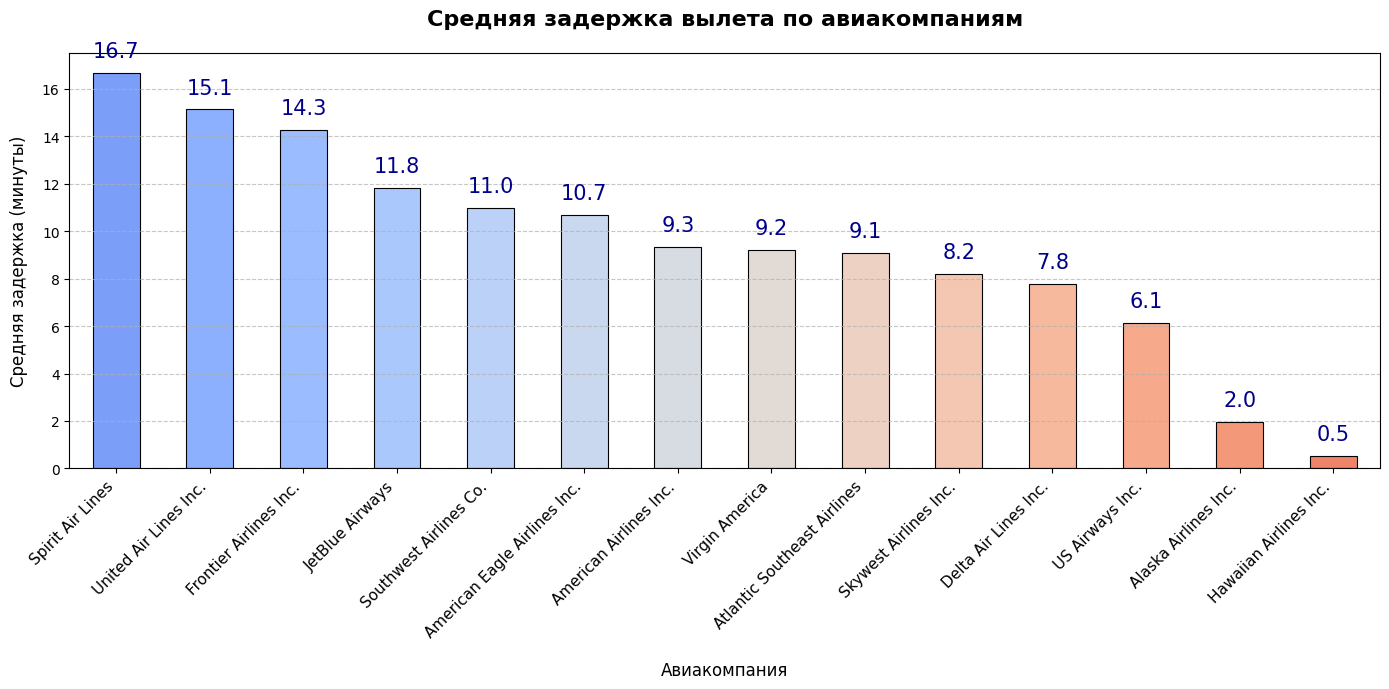

In [ ]:
flights_with_airlines = pd.merge(flights, airlines, left_on='AIRLINE', right_on='IATA_CODE')
delay_by_airline = flights_with_airlines.groupby('AIRLINE_y')['DEPARTURE_DELAY'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 7))

colors = plt.cm.coolwarm(np.linspace(0.2, 0.8, len(delay_by_airline)))

delay_by_airline.plot(kind='bar', color=colors, edgecolor='black', linewidth=0.8)

plt.title('Средняя задержка вылета по авиакомпаниям', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Авиакомпания', fontsize=12, labelpad=15)
plt.ylabel('Средняя задержка (минуты)', fontsize=12, labelpad=10)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, value in enumerate(delay_by_airline):
    plt.text(i, value + 0.5, f'{value:.1f}', ha='center', va='bottom', fontsize=15, color='darkblue')

plt.tight_layout()
plt.show()

**Вывод:** Американские авиакомпании "Spirit Air Lines" и "United Air Lines Inc." имеют наибольшую среднюю задержку вылетов. Авиакомпании "Alaska Airlinea Inc.", "Hawaiian Airlines Inc." являются наиболее пунктуальными. \\
Министерству транспорта следует направить рекомендации корпорациям "Spirit Air Lines" и "United Air Lines Inc." для:

*   оптимизации расписания
*   улучшения наземного обслуживания
*   улучшение процесса обучения персонала
*   гибкости маршрутов





# **II. Задержки по аэропортам**
Рекомендуем Министерству транспорта США после анализа задержек по авиакомпаниям обратить внимание на исследование задержек в зависимости от аэропортов. \\
**Гипотеза:** Между аэропортами имеются отличия, выраженные в числе задержек рейсов. \\
**Цель:** Выявить аэропорты с наибольшими среднеми задержками. \\
**Средства:** Анализ проведём с помощью построения линейчатой диаграммы. Так же отметим наиболее непунктуальные аэропорты на карте США.

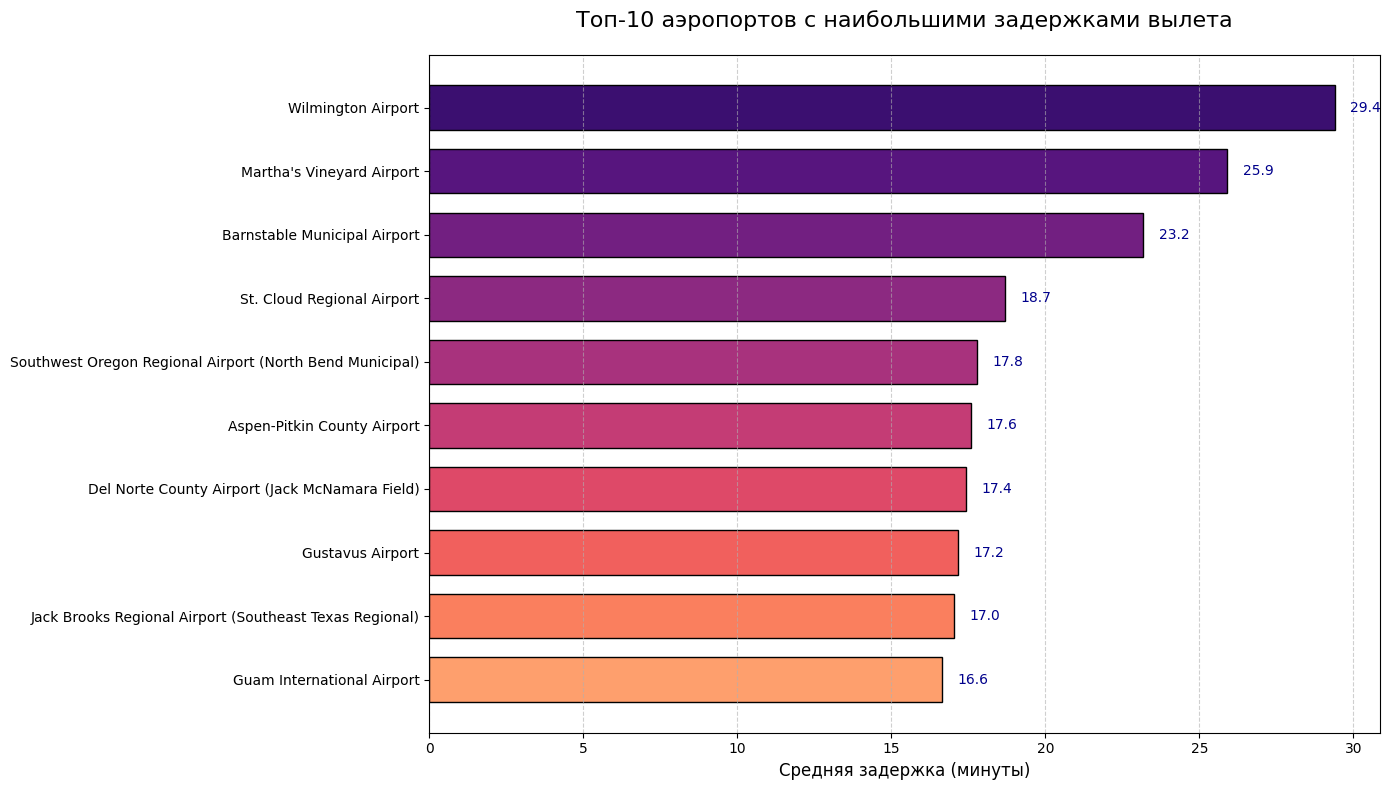

In [ ]:
delays_by_airport = flights.groupby('ORIGIN_AIRPORT')['DEPARTURE_DELAY'].mean().reset_index()
delays_by_airport = delays_by_airport.merge(airports, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE')
top_delayed_airports = delays_by_airport.sort_values('DEPARTURE_DELAY', ascending=False).head(10)

colors = plt.cm.magma(np.linspace(0.2, 0.8, len(top_delayed_airports)))

plt.figure(figsize=(14, 8))
bars = plt.barh(y=top_delayed_airports['AIRPORT'],width=top_delayed_airports['DEPARTURE_DELAY'],color=colors,edgecolor='black',height=0.7)

plt.gca().invert_yaxis()

plt.title('Топ-10 аэропортов с наибольшими задержками вылета', fontsize=16, pad=20)
plt.xlabel('Средняя задержка (минуты)', fontsize=12)
plt.ylabel('')
plt.grid(axis='x', linestyle='--', alpha=0.6)

for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 0.5,
        bar.get_y() + bar.get_height()/2,
        f'{width:.1f}',
        va='center',
        ha='left',
        fontsize=10,
        color='darkblue'
    )

plt.tight_layout()
plt.show()

In [ ]:
pip install cartopy geopandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 81.2 MB/s eta 0:00:00


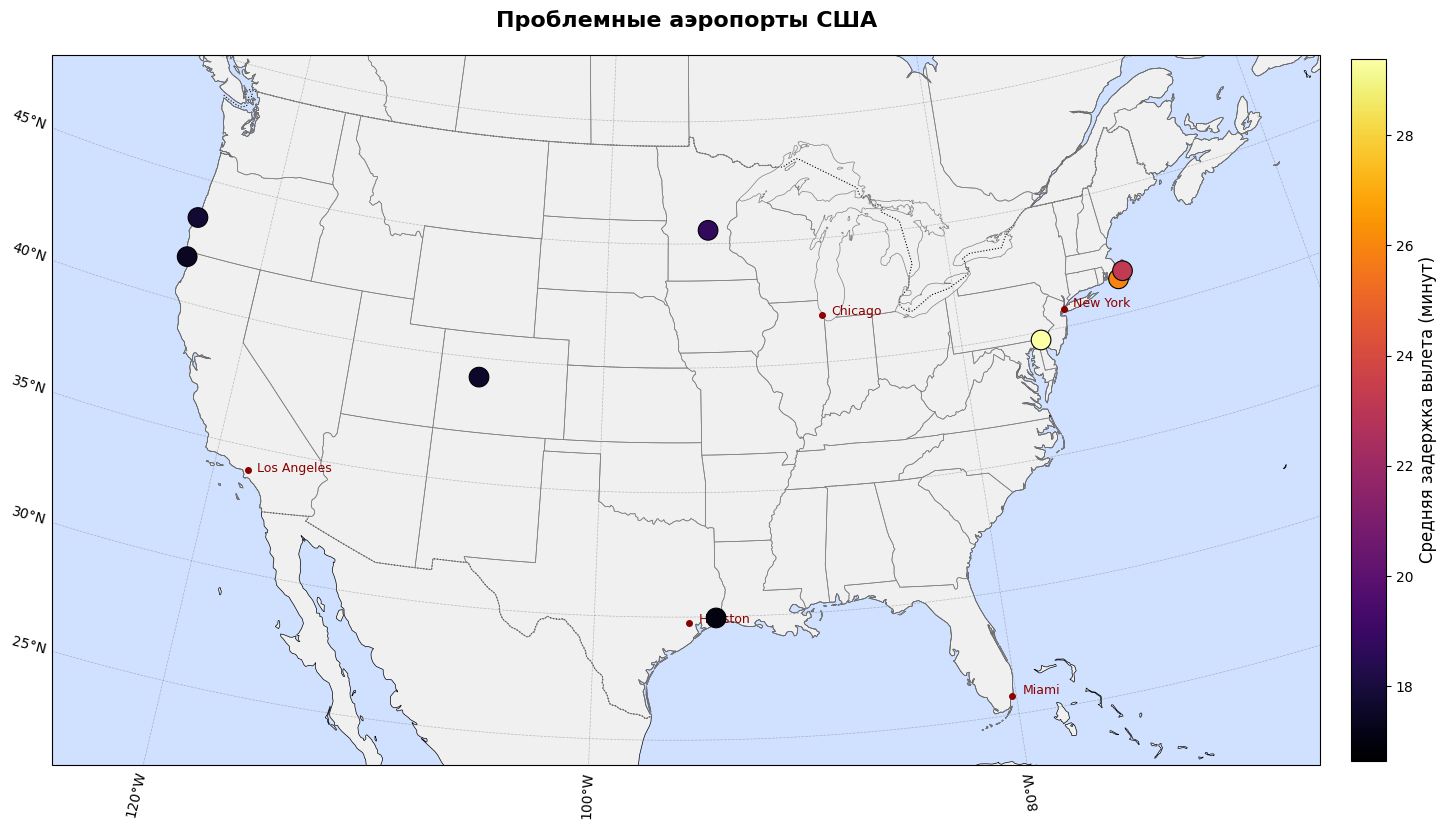

In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

plt.figure(figsize=(16, 12))

ax = plt.axes(projection=ccrs.AlbersEqualArea(central_longitude=-96, central_latitude=37.5))


ax.set_extent([-125, -66, 24, 50], crs=ccrs.PlateCarree())


ax.add_feature(cfeature.LAND, facecolor='#f0f0f0')
ax.add_feature(cfeature.OCEAN, facecolor='#d0e0ff')
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
ax.add_feature(cfeature.BORDERS.with_scale('50m'), linestyle=':', linewidth=0.8)
ax.add_feature(cfeature.STATES.with_scale('50m'), linewidth=0.5, edgecolor='gray')


cities = {
    'New York': (-74.0060, 40.7128),
    'Los Angeles': (-118.2437, 34.0522),
    'Chicago': (-87.6298, 41.8781),
    'Houston': (-95.3698, 29.7604),
    'Miami': (-80.1918, 25.7617)
}

for city, (lon, lat) in cities.items():
    ax.plot(lon, lat, 'o', markersize=4, color='darkred', transform=ccrs.PlateCarree())
    ax.text(lon+0.5, lat, city, fontsize=9, transform=ccrs.PlateCarree(), color='darkred')

sc = ax.scatter(
    top_delayed_airports['LONGITUDE'],
    top_delayed_airports['LATITUDE'],
    c=top_delayed_airports['DEPARTURE_DELAY'],
    cmap='inferno',
    s=200,
    edgecolor='black',
    linewidth=0.8,
    transform=ccrs.PlateCarree(),
    zorder=10
)

gl = ax.gridlines(
    crs=ccrs.PlateCarree(),
    draw_labels=True,
    linewidth=0.5,
    color='gray',
    alpha=0.5,
    linestyle='--'
)
gl.top_labels = False
gl.right_labels = False

cbar = plt.colorbar(sc, orientation='vertical', shrink=0.6, pad=0.02)
cbar.set_label('Средняя задержка вылета (минут)', fontsize=12)

plt.title('Проблемные аэропорты США', fontsize=16, pad=20, fontweight='bold')
plt.tight_layout()
plt.show()

**Вывод:** Американские аэропорты "Wilmigton Airport" и "Martha's Vineyard Airport" имеют наибольшую среднюю задержку вылетов. \\
Министерству транспорта США следует направить рекомендации аэропортам "Wilmigton Airport" и "Martha's Vineyard Airport" для

*   оптимизации процесса безопасности
*   улучшения инфраструктуры
*   эффективного управления движением
*   синхронизации с авиакомпаниями
*   улучшения средств информарования пассажиров

# **III. Задержки по сезонам**
Теперь рекомендуем Министерству транспорта США обратить внимание на аспекты, связанные с тем, что задержки рейсов зависит от временного промежутка. В частности, предполагается, что они зависят от:
*   месяца
*   дня недели
*   времени суток \\
Рассмотрим первый пункт. \\
 **Гипотеза:** В задержки рейсов имются сезонные колебания. \\
 **Цель:** Выявить месяцы, в которые задержки рейсов максимальны. \\
 **Средства:** Анализ проведём с помощью построения графика, где на горизонтальной оси мы будем откладывать месяца, а на вертикальной - время.




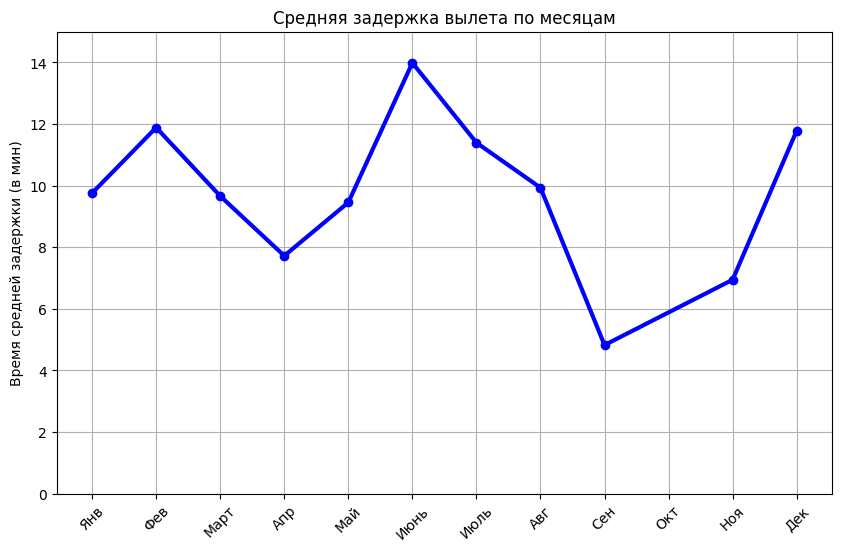

In [ ]:
m = flights.groupby('MONTH')['DEPARTURE_DELAY'].mean()
months = ['Янв', 'Фев', 'Март', 'Апр', 'Mай', 'Июнь', 'Июль', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек']

plt.figure(figsize = (10, 6))
plt.plot(m.index, m.values, marker = 'o', color = 'blue', linestyle = '-', linewidth = 3)
plt.title('Средняя задержка вылета по месяцам')
plt.ylabel('Время средней задержки (в мин)')
plt.xticks(range(1, 13), months, rotation = 45)
plt.ylim(0, 15)
plt.grid(True)
plt.show()

**Вывод:** Наибольшее число задержек в июне, феврале и декабре. Укажем основные причины такого распределения:

*   Пиковый туристический сезон: Июнь знаменует начало летнего туристического сезона в северном полушарии, что приводит к увеличению числа пассажиров и рейсов. Высокая нагрузка на аэропорты и авиакомпании может привести к задержкам.
*   Погодные условия: Лето часто сопровождается нестабильными погодными условиями, такими как грозы, сильные дожди или ураганы, которые могут вызывать задержки и отмены рейсов.
*   Сложности с наземным обслуживанием: Увеличение объемов багажа и пассажиров может создавать дополнительные проблемы для наземного обслуживания, что также может приводить к задержкам.



# **IV. Задержки по дням недели**
Рассмотрим второй пункт. \\
**Гипотеза:** В задержки рейсов имются недельные колебания. \\
 **Цель:** Выявить день недели с аномально высокими задержками. \\
 **Средства:** Анализ проведём с помощью построения круговой диаграммы.

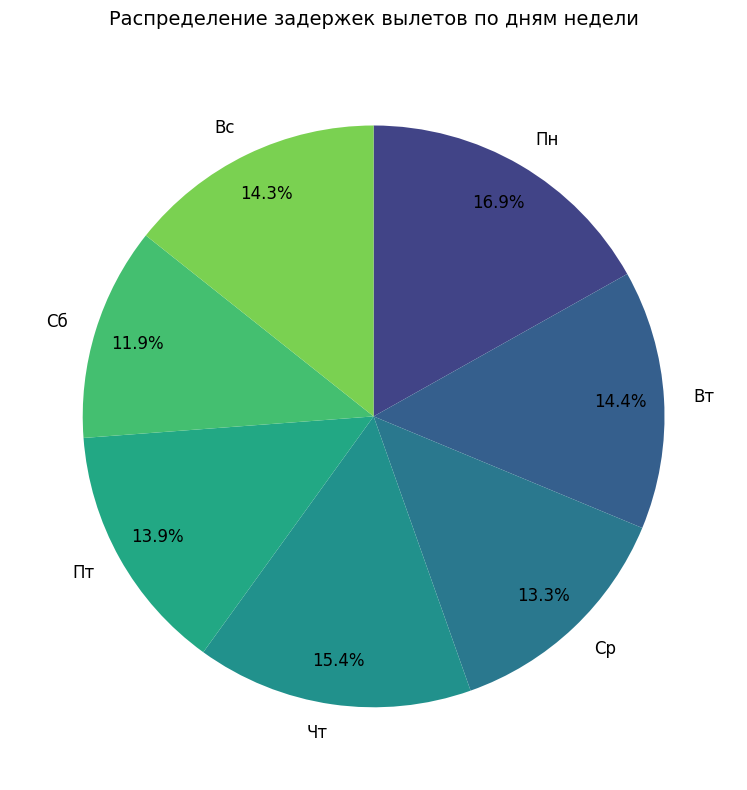

In [ ]:
# Подготовка данных
delays_by_day = flights.groupby('DAY_OF_WEEK')['DEPARTURE_DELAY'].mean().reset_index()
delays_by_day['DAY_NAME'] = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']
delays_by_day = delays_by_day.sort_values('DAY_OF_WEEK')

plt.figure(figsize=(10, 8))

colors = plt.cm.viridis(np.linspace(0.2, 0.8, 7))

wedges, texts, autotexts = plt.pie(
    delays_by_day['DEPARTURE_DELAY'],
    labels=delays_by_day['DAY_NAME'],
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False,
    pctdistance=0.85,
    textprops={'fontsize': 12}
)

plt.title('Распределение задержек вылетов по дням недели', fontsize=14, pad=20)

plt.tight_layout()
plt.show()

**Вывод:** Наибольшие задержки наблюдаются в понедельник и четверг. В середине недели (среда) происходит разгрузка. В субботу число задержек минимально. Это указывает на проблему неравномерного распределения нагрузки на инфраструктуру аэропортов.

# **V. Задержки по времени суток**
Рассмотрим третий пункт. \\
**Гипотеза:** В задержки рейсов имются суточные колебания. \\
 **Цель:** Выявить временной промежуток в течение суток, обладающий наибольшими задержками. \\
 **Средства:** Анализ проведём с помощью построения графика.

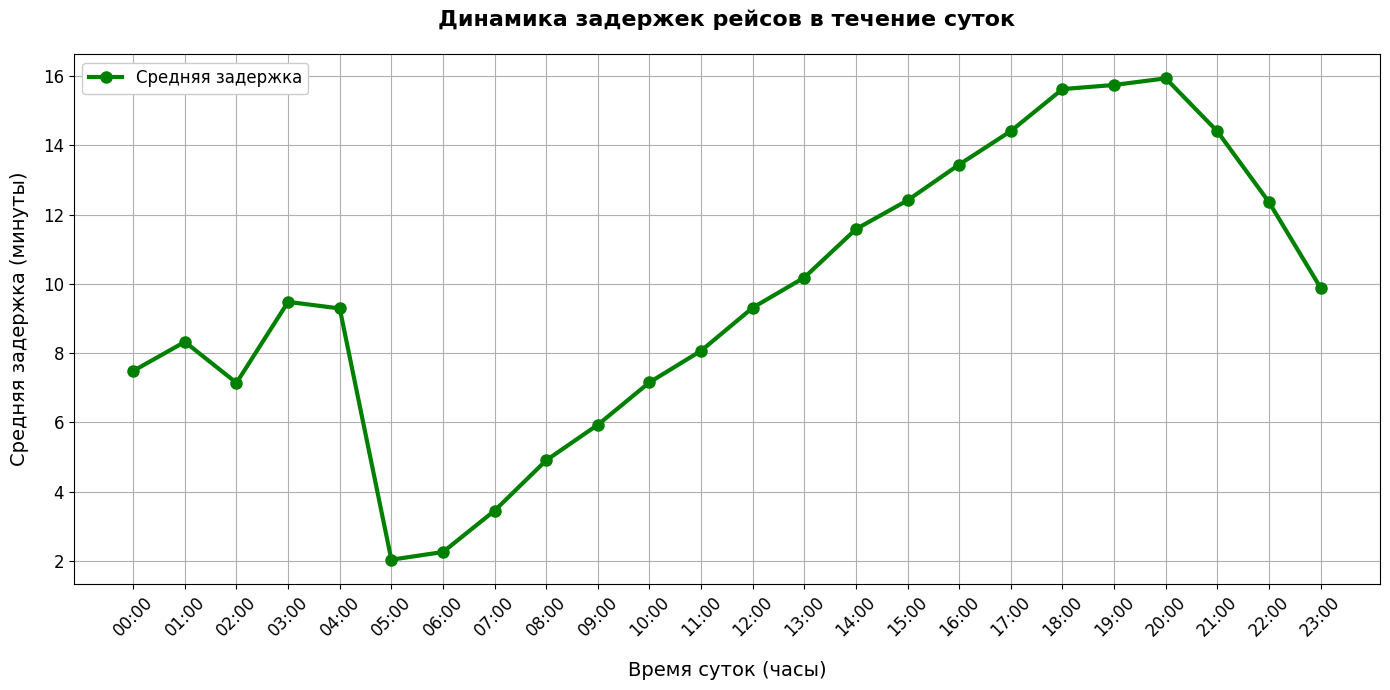

In [ ]:
flights['HOUR'] = flights['SCHEDULED_DEPARTURE'] // 100


delay_by_hour = flights.groupby('HOUR')['DEPARTURE_DELAY'].mean()


plt.figure(figsize=(14, 7))


plt.plot(delay_by_hour.index, delay_by_hour.values, marker='o', markersize=8,color='green', linewidth=3,label='Средняя задержка')

plt.xticks(range(24), [f'{h:02d}:00' for h in range(24)], rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)


plt.title('Динамика задержек рейсов в течение суток', fontsize=16, pad=20,fontweight='bold')
plt.xlabel('Время суток (часы)', fontsize=14, labelpad=15)
plt.ylabel('Средняя задержка (минуты)', fontsize=14, labelpad=10)


plt.legend(loc='upper left',fontsize=12,framealpha=1)

plt.tight_layout()
plt.show()

**Вывод:** Наибольшие задержки наблюдаются в вечерние часы (15:00-20:00). Это связано с накоплением задержек в течение дня и пиковой нагрузкой на аэропорты. Ночные часы наименее загружены. Рекомендуется пересмотреть расписание и ресурсы аэропортов в вечерние часы.

# **VI. Основные причины задержек**
Покажем Министреству транспорта США основные причины задержек. На основе выявленных причин авиаперевозчики смогут оптимизировать свою операционную деятельность. \\
**Гипотеза:** Среди всех возможных причин задержей имеются доминирующие. \\
**Цель:** Выявить доминирующие причины задержей рейсов для дальнейшего их устранения со стороны компании-перевозчика. \\
**Средства:** Анализ проведём с помощью построения круговой диаграммы.

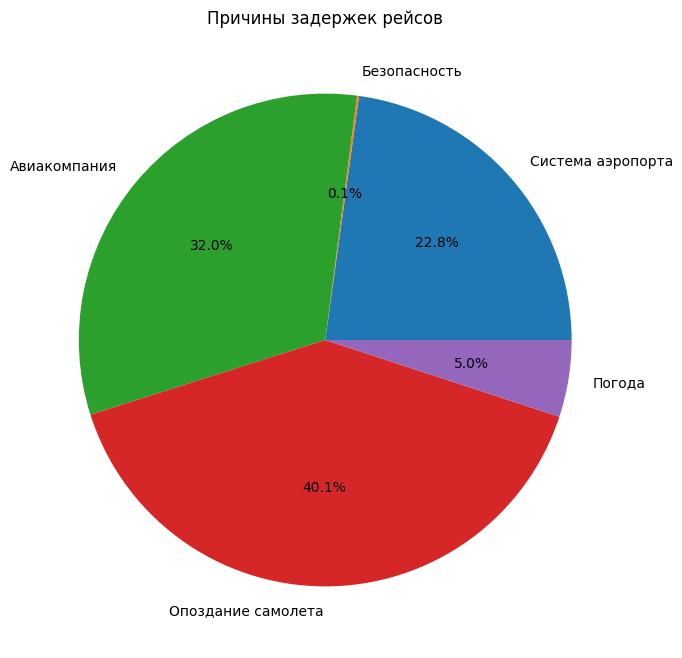

In [14]:
delay_types = flights[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY','WEATHER_DELAY']].sum()

plt.figure(figsize=(8, 8))
plt.pie(delay_types, labels=['Система аэропорта', 'Безопасность', 'Авиакомпания', 'Опоздание самолета', 'Погода'],autopct='%1.1f%%')
plt.title('Причины задержек рейсов')
plt.show()

**Вывод:** \\
Главная причина задержек — опоздание самолета (видимо, из-за задержек предыдущих рейсов). Это системная проблема логистики.

Вторая по значимости причина — авиакомпании (организационные проблемы, задержки экипажа и т.д.).